In [1]:
import sys
import os

sys.path.insert(1, os.path.join(sys.path[0], '..')) 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import stats

# Theoretical results riffle shuffle

<b>In this notebook we will investigate the theoretical results of the Total Variation Distance vs the number of shuffles needed to randomise a card deck</b>

During this notebook we will denote the following variables:
* random_seed: this allows another user to replicate the results of running the simulations
* `n`: the number of cards in the deck
* `r`: the number of rising sequences appearing in the deck
* `k`: indicating a shuffle, or a number of shuffles


We will investigate the number of shuffles needed for a deck of cards consisting of 26, 52, 104 and 156 cards. Representing half a deck of cards, a full deck of cards, two decks of cards and three decks of cards, respectively.

We will investigate a maximum of `k=15` shuffles.

As in the paper, for a riffle shuffle, we define `a=2`.

In the next cell we calculate the Total Variation Distance (TVD) for decks of 26, 52, 104 and 156 cards. The results are stored in a dictionary `results`.


Technical note: the key of the dictionary is the number of cards in the deck. E.g.: 
to get the TVD for the deck of 52 cards: `results.get(52)`. This will return a list. Each item in the list is the TVD after a shuffle; the first item is the TVD after one shuffle, the second item is the TVD after two shuffles, etc. We will use this dictionary to create a Pandas DataFrame which displays the TVD values in a presentable way.

In [3]:
n_list = [26, 52, 104, 156,]
max_k = 15
shuffles = [k for k in range(1, max_k+1)]
a = 2

results = {}

for n in n_list:
    uniform = stats.uniform(n)
    var_distance_per_shuffle = []
    
    for k in shuffles:
        var_dis_k = 0

        for r in range(1, n+1):
            var_dis_k = stats.theoretical_total_variation_distance_riffle_shuffle(a, n, k, r, uniform)

        var_distance_per_shuffle.append(var_dis_k)
        
    results[n] = var_distance_per_shuffle

In [4]:
df = pd.DataFrame(results)
df.index = df.index +1
df

,26,52,104,156
1,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000
3,0.999728,1.000000,1.000000,1.000000
4,0.804000,1.000000,1.000000,1.000000
5,0.469248,0.923733,1.000000,1.000000
6,0.234471,0.613550,0.987658,0.999999
7,0.122332,0.334061,0.771800,0.976189
8,0.061830,0.167159,0.453809,0.733748
9,0.030999,0.085420,0.237301,0.420209
10,0.015510,0.042946,0.118724,0.217897


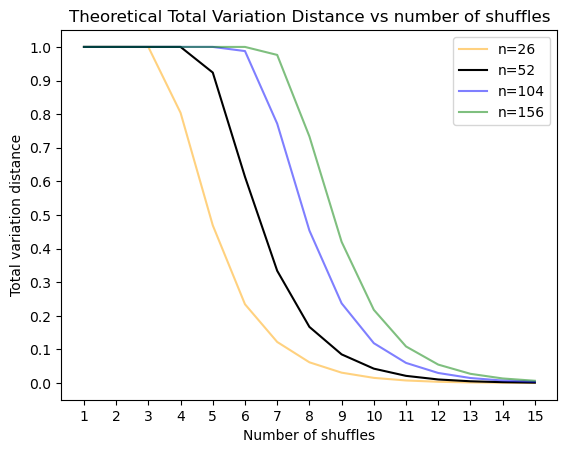

In [5]:
import matplotlib.ticker as ticker

plt.rcParams.update(plt.rcParamsDefault)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Number of shuffles')
ax.set_ylabel('Total variation distance')
plt.plot(shuffles, results.get(26), "orange", alpha=0.5, label='n=26')
plt.plot(shuffles, results.get(52), "black", label='n=52')
plt.plot(shuffles, results.get(104), "blue", alpha=0.5, label='n=104')
plt.plot(shuffles, results.get(156), "green", alpha=0.5, label='n=156')
plt.xticks(range(1, len(shuffles)+1), shuffles)
plt.legend()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.title("Theoretical Total Variation Distance vs number of shuffles")
plt.show()